In [3]:
!pip install --user nltk

     |████████████████████████████████| 1.4 MB 9.0 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434673 sha256=4932f45a30a99df8b6eb7655fec17681338cc73169ac537ac033b7bae8bc39a0
  Stored in directory: /home/raltman/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk


In [4]:
# import pyLDAvis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, LatentDirichletAllocation as LDA
from nltk.collocations import BigramAssocMeasures as bam, \
    BigramCollocationFinder as bcf

sns.set()

In [5]:
data = pd.read_csv("data/lemmatized_dataset.tsv", sep='\t')

In [74]:
cv = CountVectorizer(
    stop_words='english',
    ngram_range=(1, 2),
    min_df=10,
    max_df=0.2
)
X = cv.fit_transform(data.text)

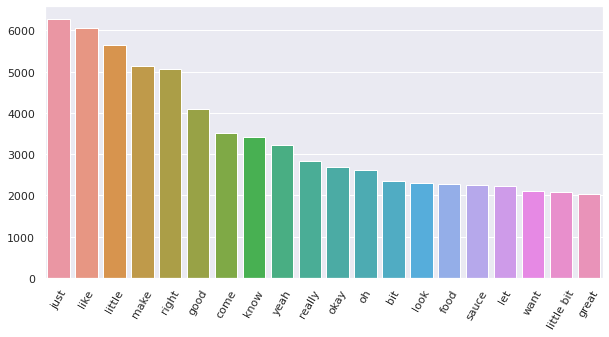

In [77]:
values = X.toarray().sum(axis=0)
labels = np.array(cv.get_feature_names())
top_n = values.argsort()[:-20-1:-1]

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(labels[top_n], values[top_n], ax=ax)
_ = ax.set_xticklabels(labels[top_n], rotation=60)

In [79]:
lda = LDA(n_components=5, n_jobs=-1)
X_lda = lda.fit_transform(X)

In [137]:
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS

In [138]:
topic_word_probs = lda.components_ / lda.components_.sum(axis=1, keepdims=True)
distance_matrix = squareform(pdist(topic_word_probs, metric='jensenshannon'))

In [139]:
mds = MDS(n_components=2, dissimilarity='precomputed')
X_mds = mds.fit_transform(distance_matrix)

In [140]:
X_lda.shape, lda.components_.shape

((25361, 5), (5, 6299))

In [141]:
doc_topic_probs = X_lda / X_lda.sum(axis=1, keepdims=True)
topic_freq = (X_lda.T * X.sum(axis=1)).A.squeeze()
topic_freq /= topic_freq.sum()

In [142]:
topic_freq

array([0.19180436, 0.30135191, 0.16536402, 0.16860685, 0.17287285])

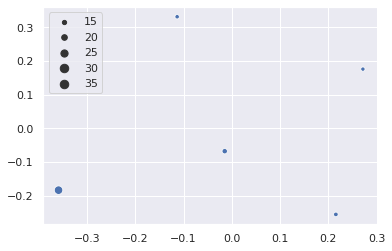

In [143]:
sns.scatterplot(*X_mds.T, size=100*topic_freq)

In [129]:
!pip install --user pyldavis

     |████████████████████████████████| 1.6 MB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 272 kB 68.2 MB/s eta 0:00:01
     |████████████████████████████████| 99 kB 1.1 MB/s  eta 0:00:01
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=a4582b147fb59557542ed1c9689a112a456591ed3a9051ca5750f42f16b62ada
  Stored in directory: /home/raltman/.cache/pip/wheels/57/de/11/0a038be70c2c212ce45fa0f4f9da165bb5dd87de1288394dc3
Successfully built pyldavis


In [144]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [145]:
pyLDAvis.sklearn.prepare(lda, X, cv, mds='mmds', n_jobs=-1)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.125846  0.195433       1        1  30.135191
0     -0.026840 -0.124232       2        1  19.180436
4     -0.121644 -0.033816       3        1  17.287285
3      0.164417 -0.108443       4        1  16.860685
2      0.109912  0.071057       5        1  16.536402, topic_info=        Term        Freq       Total Category  logprob  loglift
4136  pepper  196.000000  196.000000  Default  30.0000  30.0000
1446   drive  131.000000  131.000000  Default  29.0000  29.0000
1380   diner  135.000000  135.000000  Default  28.0000  28.0000
1980  garlic  172.000000  172.000000  Default  27.0000  27.0000
1405    dive   98.000000   98.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
3291    love   41.476882  220.290685   Topic5  -5.7886   0.1298
3231    look   44.024282  305.025146   Topic5  -5.7290  -0.1360
1082    cook   39.995472  195.222761   Topic5  -5.8250   0.2142
3347    make   42.862438  432.907015   Topic5  -5.7557  -0.5129
3843      oh   40.518871  348.653525   Topic5  -5.8120  -0.3527

[398 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
17        1  0.201067   actually
17        2  0.507958   actually
17        3  0.095242   actually
17        4  0.063495   actually
17        5  0.126989   actually
...     ...       ...        ...
6262      4  0.098922        yes
6262      5  0.060452        yes
6280      4  0.957665       yeti
6281      4  0.884511  yeti roll
6286      4  0.989703       york

[828 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 4, 3])

In [42]:
get_feature_names = np.vectorize(cv.get_feature_names().__getitem__)
top_n_words = lambda n: lda.components_.argsort(axis=1)[:, :-n-1:-1]

In [48]:
X_lda.T.shape

(10, 25361)

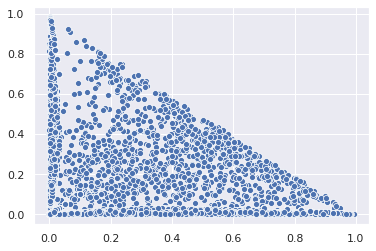

In [49]:
sns.scatterplot(*X_lda.T[:2])

In [45]:
get_feature_names(top_n_words(10))

array([['little', 'bit', 'just', 'pepper', 'okay', 'right', 'sauce',
        'salt', 'garlic', 'make'],
       ['just', 'make', 'rib', 'yes', 'right', 'like', 'yeah', 'time',
        'oh', 'come'],
       ['good', 'really', 'nice', 'little', 'flavor', 'thank', 'great',
        'tender', 'just', 'oh'],
       ['oh', 'right', 'yeah', 'just', 'like', 'know', 'come', 'joint',
        'guy', 'thank'],
       ['food', 'know', 'come', 'just', 'say', 'good', 'place', 'like',
        'people', 'right'],
       ['make', 'chef', 'new', 'like', 'come', 'pork', 'right', 'just',
        'place', 'fry'],
       ['like', 'make', 'just', 'burger', 'good', 'cheese', 'know',
        'bacon', 'think', 'really'],
       ['drive', 'diner', 'dive', 'like', 'barbecue', 'look', 'great',
        'love', 'just', 'come'],
       ['chicken', 'make', 'like', 'right', 'fry', 'cook', 'fish',
        'beef', 'want', 'kind'],
       ['know', 'come', 'right', 'like', 'just', 'cook', 'restaurant',
        'make', 'think'

In [35]:
import numpy as np
a = np.array([[1,2,3],[5,4,3],[3,10,7]])
a.argsort(axis=1)[:, ::-1]

array([[2, 1, 0],
       [0, 1, 2],
       [1, 2, 0]])

In [36]:
a

array([[ 1,  2,  3],
       [ 5,  4,  3],
       [ 3, 10,  7]])

In [42]:
ldavis = pyldavis.sklearn.prepare(lda, X, cv)
pyldavis.save_html(ldavis, 'ldavis.html')

In [71]:
a = bcf.from_documents(data.text)

In [72]:
b = bam()

In [73]:
q = dict(a.score_ngrams(b.raw_freq))

In [75]:
q['onion', 'garlic']

1.1776205000176643e-05

In [23]:
X_sum = X.sum(axis=0).A.squeeze()
labels = cv.get_feature_names()

In [24]:
[labels[i] for i in X_sum.argsort()[:50]]

['essentially',
 'tambourine',
 'sotfour',
 'dudas',
 'bollito',
 'mott',
 'boomerang',
 'beantown',
 'muslim',
 'electricity',
 'stogy',
 'stokie',
 'whack',
 'tighter',
 'bend',
 'gardener',
 'bully',
 'giddyap',
 'bureau',
 'limpia',
 'shaking',
 'tarentines',
 'relative',
 'carrying',
 'randy',
 'rita',
 'loo',
 'pomp',
 'romana',
 'coop',
 'purveyor',
 'ciao',
 'broccolini',
 'baseball',
 'fk',
 'initially',
 'retain',
 'simpler',
 'introduced',
 'chacha',
 'fella',
 'diwali',
 'corporate',
 'vet',
 'joining',
 'cinema',
 'aaron',
 'renal',
 'narrow',
 'boiler']

In [25]:
inds = X_sum.argsort()[-1:-50:-1]

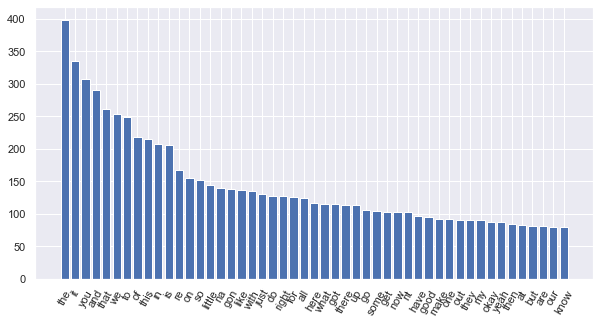

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar([labels[i] for i in inds], X_sum[inds])
_ = ax.set_xticklabels([labels[i] for i in inds], rotation=60)

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.A)

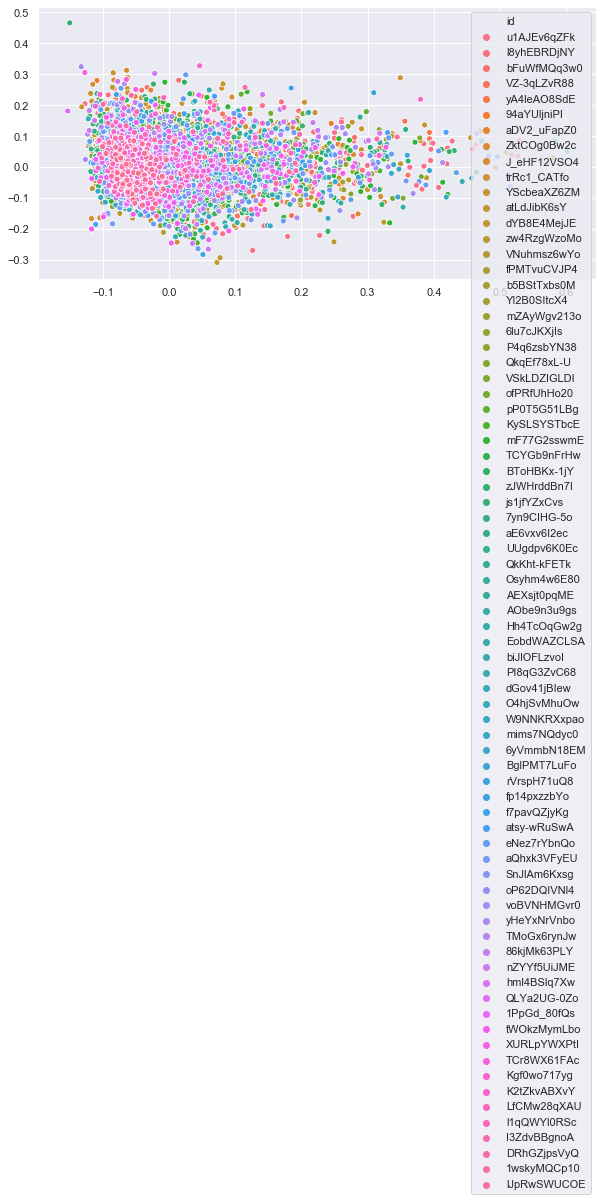

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(*X_pca.T, hue=data.id)

In [182]:
X

<3394x7469 sparse matrix of type '<class 'numpy.int64'>'
	with 93804 stored elements in Compressed Sparse Row format>